# **Initial Analysis**


*   Connectivity, diameter and average shortest path
*   Degree distribution and gamma estimation




In [30]:
#import all necessary packages
import numpy as np
import pandas as pd
import pickle
import scipy.sparse as sps
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
from google.colab import drive
drive.mount('/content/drive')
%run "drive/MyDrive/lab2/communities_mod.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
bertopic 1.11
softlouvain v1.10


In [32]:
in_dir = "drive/MyDrive/lab2/"
in_file = "reddit_title_tot"

# load word occurrences
Mwd, words, documents = pickle.load(open(in_dir+in_file+"_occurrences.p","rb"))
Mwd = sps.csr_matrix(Mwd)
Mwd, words, documents = clean_Mwd_matrix(Mwd,words,documents)
Pwd, Pww, Pdd, Paa = probability_matrices(Mwd, tform=False)

5
removing: go VERB year NOUN 


In [33]:
#create a networkx graph
G=nx.from_numpy_array(Pww)
csv_file_path=in_dir+"edgelist.csv"
nx.write_edgelist(G, csv_file_path, delimiter=',')

In [34]:
#shortest path
print("The average shortest path length is ",nx.average_shortest_path_length(G))

The average shortest path length is  1.8368065123527233


In [35]:
#connectivity of the graph
print("The graph is connected:", nx.is_connected(G))

The graph is connected: True


In [36]:
#diameter
print("The diameter is ",nx.diameter(G))

The diameter is  3


In [37]:
def draw_adjacency_matrix(ad_matrix):
  '''
  input : adjacency matrix

  output : plot of the adjacency matrix (unweighted)

  '''
  a=ad_matrix.toarray()
  a[a>0]=1
  #Plot adjacency matrix in toned-down blue and white
  fig = plt.figure(figsize=(5, 5)) # in inches
  plt.imshow(a, cmap="Blues", interpolation="none")
  plt.title("Adjacency matrix")

In [38]:
#Compute the degree of nodes
def degree(Mwd):
  '''
  input : adjacency matrix of the bipartite graph

  output : degrees of nodes

  '''
  d = np.squeeze(np.asarray(Mwd.sum(axis=1))) # words degrees
  return d

# Calculate Degree Distribution
def degree_distribution(d):
  '''
  input : degree vector

  output : probability vector (probability to have a node with a certain degree)

  '''
  k = np.unique(d)#Identify unique degree values in the network
  pk = np.histogram(d,np.append(k,k[-1]+1))[0]
  pk = pk/pk.sum()
  return pk

# Calculate Cumulative Distribution
def cumulative_distribution(pk):
  '''
  input : pdf (probability density function)

  output : cdf (cumulative distribution function)

  '''
  Pk = 1-np.cumsum(pk)
  return Pk

In [39]:
# Log Binning
def logBinning(klog, d):
  '''
  input :
  degrees in log scale
  degree vector

  output : robability vector (probability to have a node with a certain degree in log scale)

  '''
  pklog = np.histogram(d, bins=np.concatenate((klog, [np.inf])))[0]#Log-bin the degree values and compute the corresponding PDF
  pklog = pklog / np.sum(pklog)
  return pklog

In [40]:
def plot_linear(d, pk):
  '''
  input :
  degree vector
  pdf (probability density function)

  output : linear plot of degree distribution

  '''
  k = np.unique(d)#Identify unique degree values in the network
  plt.scatter(k, pk, marker='.')
  plt.grid()
  plt.xlabel('k')
  plt.ylabel('PDF')
  plt.title('linear PDF plot')

def plot_linearBinning(d, pk):
  '''
  input :
  degree vector
  pdf (probability density function)

  output : Logarithmic PDF plot

  '''
  k = np.unique(d)#Identify unique degree values in the network
  plt.loglog(k, pk, '.')
  plt.grid()
  plt.xlabel('k')
  plt.ylabel('PDF')
  plt.title('logarithmic PDF plot')

def plot_logBinning(klog, pklog):
  '''
  input :
  log bins
  pdf (probability density function in log scale)

  output :  Logarithmic PDF plot with log bins

  '''
  plt.loglog(klog, pklog, '.')
  plt.grid()
  plt.xlabel('k')
  plt.ylabel('PDF')
  plt.title('logarithmic PDF plot (log bins)')

def plot_cumulativeBinning(d, Pk):
  '''
  input :
  degree vector
  cdf (cumulative probability)

  output :  Logarithmic CCDF plot

  '''
  k = np.unique(d)#Identify unique degree values in the network
  plt.loglog(k, Pk, '.')
  plt.grid()
  plt.xlabel('k')
  plt.ylabel('CCDF')
  plt.title('logarithmic CCDF plot')

In [41]:
def gamma_ML(d, kmin):
  '''
  input :
  degree vector
  minimum degree

  output :  best gamma to approximate data

  '''
  d2 = d[d >= kmin]  # Restrict the range to degrees greater than or equal to kmin

  # Estimate the exponent using maximum likelihood
  ga = 1 + 1 / np.mean(np.log(d2 / kmin))

  print('gamma ML =', ga)
  return ga

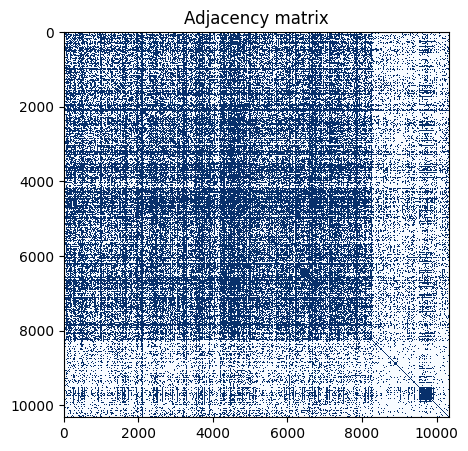

In [42]:
#adjacency matrix
draw_adjacency_matrix(Pdd)

In [43]:
#degree distribution
P=Pww
P[P>0]=1
d=degree(Mwd)#in the bipartite graph
pk=degree_distribution(d)
k = np.unique(d)
Pk=cumulative_distribution(pk)
exp = np.arange(0, np.ceil(np.log10(np.max(k))) + 0.1, 0.1)#add 0.1 because the endpoint is not included
klog = np.power(10,exp)
pklog=logBinning(klog,d)

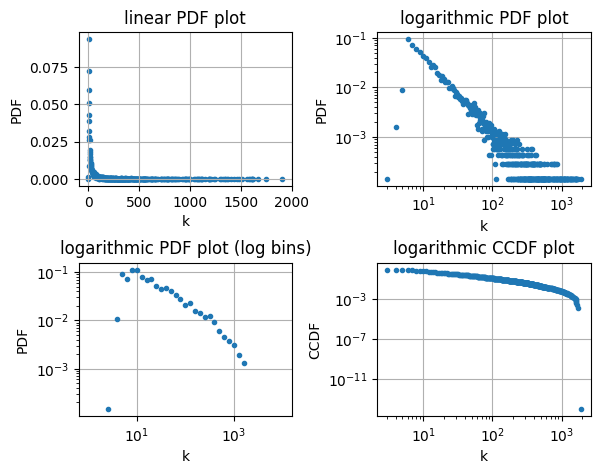

In [44]:
#plot degree distribution
plt.subplot(221)
plot_linear(d,pk)
plt.subplot(222)
plot_linearBinning(d,pk)
plt.subplot(223)
plot_logBinning(klog,pklog)
plt.subplot(224)
plot_cumulativeBinning(d, Pk)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)


gamma ML = 1.7705852110480096


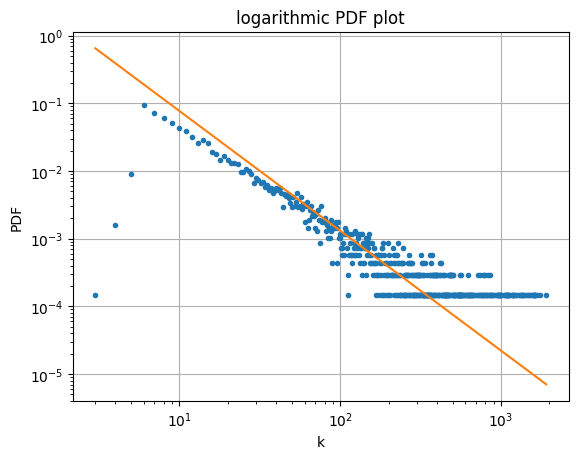

In [45]:
#gamma estimation
kmin=10
gm=gamma_ML(d, kmin)
estimated_pk=(gm-1)/kmin*np.power(k/kmin, -gm)
plot_linearBinning(d,pk)
plt.loglog(k, estimated_pk)

In [46]:
G.number_of_nodes()

6868

In [47]:
G.number_of_edges()

3855186